# Notebook to look at correlation among DJIA Stocks

In [119]:
import glob
import os

import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

from deep_rl_asset_allocation.configs import data_config, paths_config

### Load Data from Tickers

In [120]:
CSV_FILENAMES = sorted(glob.glob(os.path.join(paths_config.data_csv_dir, f"daily/*.csv")))

In [121]:
# get ticker names
columns = []
columns.append("Date")
for filename in CSV_FILENAMES:
    # print(f'{filename}')
    # get ticker name
    ticker = filename.split('/')[-1].split(".")[0]
    if ticker != "^DJI":
        columns.append(ticker)
        # print(f'{ticker}')
# init empty df
df = pd.DataFrame(columns=columns)

In [122]:
# get adj close price for each ticker
for filename in CSV_FILENAMES:
    # print(f'{filename}')
    # get ticker name
    ticker = filename.split('/')[-1].split(".")[0]
    if ticker != "^DJI" and ticker in columns:
        # get adj close price
        _temp_df = pd.read_csv(filename)
        dates = _temp_df["Date"].values
        adj_close = _temp_df["close"].values
        df["Date"] = dates
        df[ticker] = adj_close

In [ ]:
df.head()

### Plot Historical Prices

In [ ]:
# init the plot
fig, ax = plt.subplots(figsize=(20, 10))
plt.style.use("fivethirtyeight")

ax.set(xlabel="Trading Dates",
       ylabel="Cumulative Return [%]",
       title="Adjusted Close Price",
       )

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))

# init plot
dates = pd.date_range(data_config.TRAINING_START,data_config.TESTING_END,freq='d').strftime('%Y-%m-%d')
values = np.zeros(len(dates))
ax.plot(dates, values, alpha=0.01)

# plot data
for filename in CSV_FILENAMES:
    # print(f'{filename}')
    # get ticker name
    ticker = filename.split('/')[-1].split(".")[0]
    if ticker != "^DJI":
       ax.plot(df["Date"], df[ticker], label=ticker)

# plt.legend()

### Correlation Plot

In [136]:
df.sample(n=10, axis=1)

,IBM,PG,WMT,XOM,AXP,UNH,CAT,GS,INTC,V
0,53.538605,42.070244,42.273117,49.833126,15.579440,22.993860,32.318981,71.168526,10.185223,12.174688
1,53.201550,41.768787,41.785172,49.827011,16.079140,22.618822,31.747162,72.825516,9.990900,12.261261
2,54.678360,41.648201,41.415531,49.015194,16.981846,22.085443,31.554247,72.768112,10.299136,13.124698
3,53.795959,40.917995,41.060665,47.763866,16.266468,21.918760,30.086758,69.314667,9.675963,12.839920
4,53.422150,40.469162,37.985176,48.276592,16.290857,22.260447,30.327902,70.061150,9.749670,12.703229
...,...,...,...,...,...,...,...,...,...,...
2851,104.862190,112.009163,119.535782,37.757023,86.329765,277.218201,106.631844,169.988586,54.514328,173.399658
2852,104.698723,111.002411,120.294312,39.279907,84.433479,280.170563,103.592903,168.961533,55.007584,173.972473
2853,105.473122,111.232521,121.295959,39.236149,84.785378,285.529572,104.737320,171.140381,55.728489,176.234177
2854,105.980774,108.442368,119.905319,38.500961,82.107132,281.368927,103.544823,169.815781,56.453476,176.569977


<AxesSubplot:>

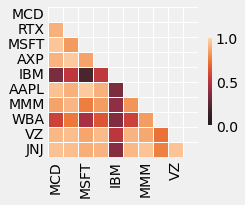

In [141]:
# sub
# Compute the correlation matrix
corr = df.corr()
corr = df.sample(n=10, axis=1).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(3, 3))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            # cmap=cmap, 
            )